## Two Period Job Search Model

In [1]:
from quantecon.distributions import BetaBinomial

import numpy as np
from numba import njit
from collections import namedtuple
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True, "font.size": 14})

In [2]:
BetaBinomial?

In [3]:
namedtuple?

In [8]:
# NamedTuple Model
Model = namedtuple("Model", ("n", "w_vals", "φ", "β", "c"))

In [9]:
def create_job_search_model(
        n=50,        # wage grid size
        w_min=10.0,  # lowest wage
        w_max=60.0,  # highest wage
        a=200,       # wage distribution parameter
        b=100,       # wage distribution parameter
        β=0.96,      # discount factor
        c=10.0       # unemployment compensation
    ):
    """
    Creates the parameters for job search model and returns the
    instance of namedtuple Model
    """
    w_vals = np.linspace(w_min, w_max, n+1)
    φ = BetaBinomial(n, a, b).pdf()
    model = Model(n=n, w_vals=w_vals, φ=φ, β=β, c=c)
    return model

In [10]:
model = create_job_search_model()

In [11]:
model

Model(n=50, w_vals=array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.]), φ=array([1.17916374e-21, 7.91385058e-20, 2.63322684e-18, 5.78951642e-17,
       9.45852331e-16, 1.22425907e-14, 1.30715161e-13, 1.18361860e-12,
       9.27411020e-12, 6.38444655e-11, 3.90773732e-10, 2.14682757e-09,
       1.06680218e-08, 4.82546790e-08, 1.99734835e-07, 7.59880083e-07,
       2.66702315e-06, 8.66281202e-06, 2.61087529e-05, 7.31758378e-05,
       1.91073370e-04, 4.65516517e-04, 1.05947988e-03, 2.25461382e-03,
       4.48909716e-03, 8.36624059e-03, 1.45968062e-02, 2.38401316e-02,
       3.64371566e-02, 5.20857161e-02, 6.95778357e-02, 8.67601096e-02,
       1.00844841e-01, 1.09072276e-01, 1.09542415e-01, 1.01894858e-01,
       8.75193404e-02, 6.91614209e-02, 5.00672786e-02, 

In [13]:
model.w_vals

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.])

In [15]:
n, w_vals, φ, β, c = model

In [16]:
w_vals.size

51

In [17]:
w_vals

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.])

In [18]:
φ.size

51

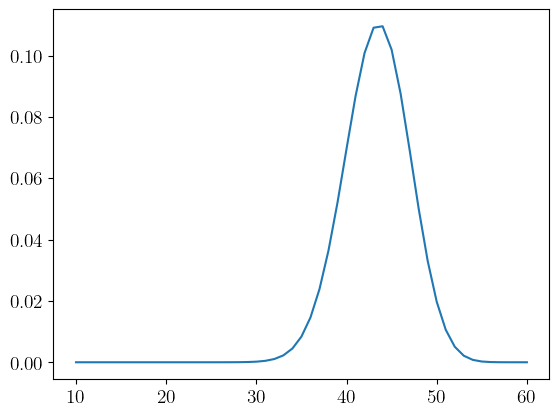

In [19]:
plt.plot(w_vals, φ);

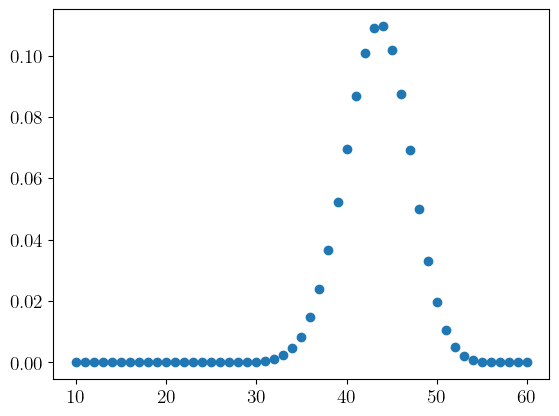

In [20]:
plt.scatter(w_vals, φ);

In [12]:
φ.sum()

1.0000000000002227

In [13]:
φ.sum() ** 1000

1.0000000002227107

In [14]:
φ_norm = φ / φ.sum()

φ_norm

array([1.17916374e-21, 7.91385058e-20, 2.63322684e-18, 5.78951642e-17,
       9.45852331e-16, 1.22425907e-14, 1.30715161e-13, 1.18361860e-12,
       9.27411020e-12, 6.38444655e-11, 3.90773732e-10, 2.14682757e-09,
       1.06680218e-08, 4.82546790e-08, 1.99734835e-07, 7.59880083e-07,
       2.66702315e-06, 8.66281202e-06, 2.61087529e-05, 7.31758378e-05,
       1.91073370e-04, 4.65516517e-04, 1.05947988e-03, 2.25461382e-03,
       4.48909716e-03, 8.36624059e-03, 1.45968062e-02, 2.38401316e-02,
       3.64371566e-02, 5.20857161e-02, 6.95778357e-02, 8.67601096e-02,
       1.00844841e-01, 1.09072276e-01, 1.09542415e-01, 1.01894858e-01,
       8.75193404e-02, 6.91614209e-02, 5.00672786e-02, 3.30312192e-02,
       1.97361535e-02, 1.05989636e-02, 5.06815521e-03, 2.13256868e-03,
       7.77765720e-04, 2.40983918e-04, 6.17067935e-05, 1.25427566e-05,
       1.89832162e-06, 1.90254097e-07, 9.47465401e-09])

In [15]:
φ_norm.sum()

0.9999999999999999

$$
v_{1}\left(w_{1}\right)	=\max\left\{ w_{1}+\beta w_{1},c+\beta\sum_{w^{\prime}\in W}v_{2}\left(w^{\prime}\right)\varphi\left(w^{\prime}\right)\right\} 
	=\max\left\{ w_{1}+\beta w_{1},h_{1}\right\} \\
v_{2}\left(w\right)=\max\left\{ c,w\right\} \\
$$

In [16]:
@njit
def v_1(w, model):
    """
    Computes lifetime value at t=1 given current wage w_1 = w
    """
    β, c = model.β, model.c
    s = np.maximum(c, model.w_vals)           # which is v2
    h_1 = c + β * np.sum(s * model.φ)
    return np.maximum(w + β * w, h_1)

$$
w_{1}^{*}:=\frac{h_{1}}{1+\beta}
$$

In [17]:
@njit
def res_wage(model):
    """
    Computes reservation wage at t=1
    """
    β, c = model.β, model.c
    s = np.maximum(c, model.w_vals)
    h_1 = c + β * np.sum(s * model.φ)
    return h_1 / (1 + β)

In [18]:
w_star = res_wage(model)

w_star

26.326530612249694

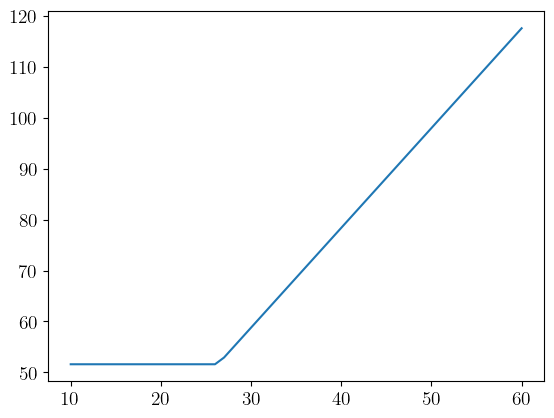

In [19]:
v = np.array([v_1(w, model) for w in w_vals])

plt.plot(w_vals, v)

In [20]:
##### Plots #####

default_model = create_job_search_model()


def fig_dist(model=default_model, fs=10):
    """
    Plot the distribution of wages
    """
    fig, ax = plt.subplots()
    ax.plot(model.w_vals, model.φ, "-o", alpha=0.5, label="wage distribution")
    ax.legend(loc="upper left", fontsize=fs)


def fig_v1(model=default_model, savefig=False,
                  figname="./figures/iid_job_search_0_py.pdf", fs=18):
    """
    Plot two-period value function and res wage
    """
    n, w_vals, φ, β, c = model

    v = [v_1(w, model) for w in w_vals]
    w_star = res_wage(model)
    s = np.maximum(c, w_vals)
    continuation_val = c + β * np.sum(s * φ)
    min_w, max_w = np.min(w_vals), np.max(w_vals)

    fontdict = {'fontsize': 10}
    fig, ax = plt.subplots(figsize=(9, 5.5))
    ax.set_ylim(0, 120)
    ax.set_xlim(min_w, max_w)
    ax.vlines((w_star,), (0,), (continuation_val,), lw=0.5)
    ax.set_yticks((0, 50, 100))
    ax.set_yticklabels((0, 50, 100), fontdict=fontdict)
    ax.set_xticks((min_w, w_star, max_w))
    ax.set_xticklabels((min_w, r"$w^*_1$", max_w), fontdict=fontdict)
    ax.plot(w_vals, w_vals + β * w_vals, alpha=0.8, linewidth=3,
            label=r"$w_1 + \beta w_1$")
    ax.plot(w_vals, [continuation_val]*(n+1), linewidth=3, alpha=0.8,
            label=r"$c + \beta \sum_{w'} \max\{c, w'\} \varphi(w')$" )
    ax.plot(w_vals, v, "k--", markersize=2, alpha=1.0, linewidth=2,
            label=r"$v_1(w_1)$")
    ax.legend(frameon=False, fontsize=fs, loc="upper left")
    if savefig:
        fig.savefig(figname)

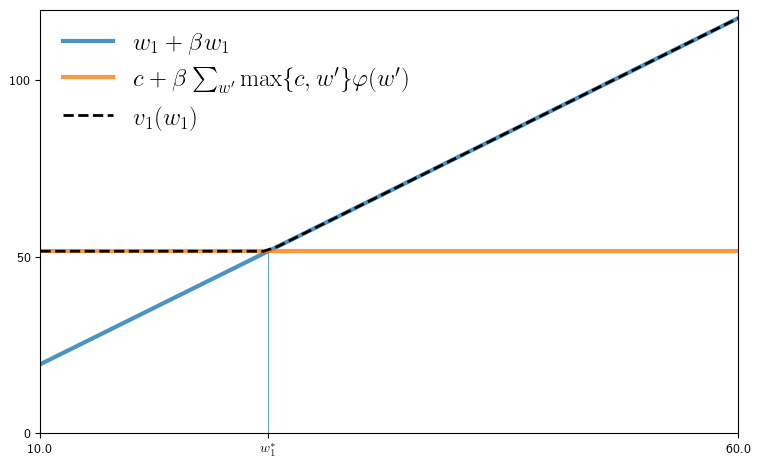

In [21]:
fig_v1()

## Three Period Job Search Model

$$
v_{2}\left(w_{2}\right)=\max\left\{ c,w_{2}\right\}  \\
v_{t}\left(w_{t}\right)=\max\left\{ w_{t}+\sum_{i=1}^{T-t}\beta^{i}w_{t},c+\beta\sum_{w^{\prime}\in W}v_{t+1}\left(w^{\prime}\right)\varphi\left(w^{\prime}\right)\right\} ,\quad t=0,1
$$

In [22]:
# @njit
# def v_1(w, model):
#     """
#     Computes lifetime value at t=1 given current wage w_1 = w
#     """
#     β, c = model.β, model.c
#     s = np.maximum(c, model.w_vals)          # which is v2
#     h_1 = c + β * np.sum(s * model.φ)
#     return np.maximum(w + β * w, h_1)

In [23]:
@njit
def v_t(w, t, v_next, model):
    """
    Computes lifetime value at t given current wage w_t = w and v_{t+1}
    """
    β, c = model.β, model.c
    h_t = c + β * np.sum(v_next * model.φ)
    z_t = w * (β ** np.arange(0, 3-1 - t + 1, 1)).sum()   # T = 3-1
    return np.maximum(z_t, h_t)

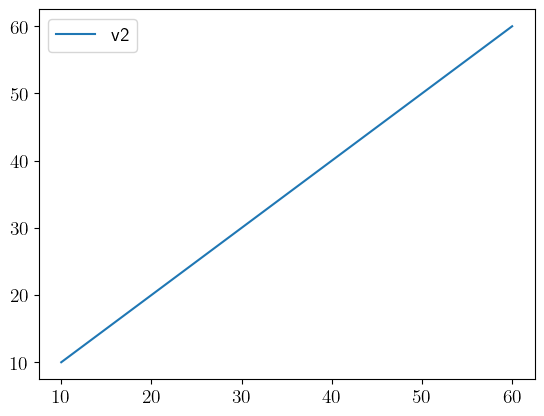

In [24]:
v2 = np.maximum(c, w_vals)

plt.plot(w_vals, v2, label='v2')
plt.legend()

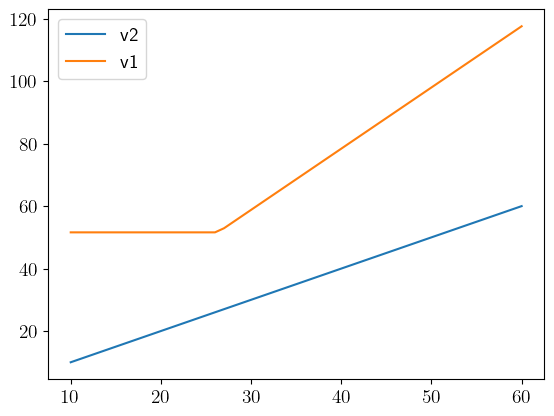

In [25]:
t = 1
v1 = np.array([v_t(w, t, v2, model) for w in w_vals])

plt.plot(w_vals, v2, label='v2')
plt.plot(w_vals, v1, label='v1')
plt.legend()

In [26]:
np.max(np.abs(v1 - v))

1.4210854715202004e-14

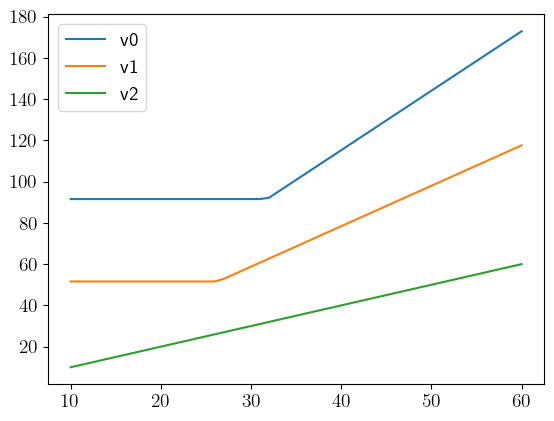

In [27]:
t = 0
v0 = np.array([v_t(w, t, v1, model) for w in w_vals])

plt.plot(w_vals, v0, label='v0')
plt.plot(w_vals, v1, label='v1')
plt.plot(w_vals, v2, label='v2')
plt.legend()

Use array to circumvent the need of defining mulptile variable $v_{t}$.

In [28]:
N = 3
v_arr = np.empty((model.w_vals.size, N))

v_arr.shape

(51, 3)

In [29]:
# v2 = np.maximum(c, w_vals)
v_arr[:, 2] = np.maximum(c, w_vals)

t = 1
v_arr[:, t] = np.array([v_t(w, t, v_arr[:, t+1], model) for w in w_vals])

t = 0
v_arr[:, t] = np.array([v_t(w, t, v_arr[:, t+1], model) for w in w_vals])

In [30]:
np.max(np.abs(v_arr[:, 2] - v2))

0.0

In [31]:
np.max(np.abs(v_arr[:, 1] - v1))

0.0

In [32]:
np.max(np.abs(v_arr[:, 0] - v0))

0.0

# For loops

In [33]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [34]:
for i in range(0, 10, 1):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [35]:
for i in range(9, -1, -1):
    print(i)

9
8
7
6
5
4
3
2
1
0


## Q. How to compute N period Job Search Model?

Where to put `N`? => `Model.N`

Prepare numpy matrix `v` (of what size)?  
compute `v[N-1]`  
$t \leftarrow N-2$  
while $t \geq 0$ do  
   compute `v[t]` using `v[t+1]`  
   $t \leftarrow t-1$  
end  

In [36]:
@njit
def backwards_induction(...):

    # unpack model parameters

    # initialization

    # compute v[N-1]

    # for loop, compute v[N-2], v[N-3], ..., v[0]

    return ...

SyntaxError: invalid syntax (3802670384.py, line 2)